# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:60px 0; border: double; font-size:100px">Natural Language Processing</div>

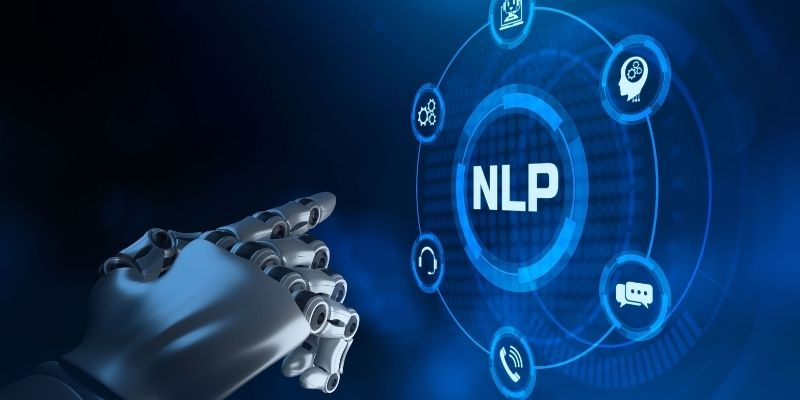

---

# <div style="background-color:lightsteelblue; text-align:center; color:black; vertical-align: middle; padding:40px 0; border: double; font-size:50px">Project Summary:</div>

## We acquired 100 READMEs from [Github's Most Starred Repos](https://github.com/search?l=%3Fspoken_language_code%3Den&p=11&q=stars%3A%3E10000&ref=advsearch&type=Repositories) (10/17/22), encoded and decoded the text, and created n-grams to predict the programming language used within the repo.

## Baseline prediction, predicting Javascript, was 25%. Our best model predicted the programming language at 60%.

---

# Imports:

In [1]:
# Imports everything from functions.py, including all libraries functions.py uses.
from functions import *

# Questions:
    - What are the most common words in READMEs?
    - Does the length of the README vary by programming language?
    - Do different programming languages use a different number of unique words?
    - Are there any words that uniquely identify a programming language?
    
# Hypothesis'
    - ReadME's that fall under the 'resources' type will be longer than other programming languages
    - There will be specific terms found only in specific language, such as references to the language, and to libraries or functions within it.

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Acquisition:</div>

Data was aquired using the acquire.py we were supplied, we fed it the top 100 starred GitHub repositories from Monday, Oct 17, 2022. then saved the data.json as a .csv for future reference.
- This notebook works off the assumption that you downloaded the json_data.csv from the GitHub.
> One entry also loaded a readme from another source, so we had it replace the hyperlink to that data with the proper readme data it was referencing.

In [2]:
# Take a look at the full table
df = pd.read_csv('json_data.csv', index_col=[0])
df

,repo,language,readme_contents,length,clean,word_count,words
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"['freecodecamp', 'social', 'pull', 'request', ...",668,freecodecamp social pull request open source s...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"['please', 'note', 'exists', 'official', 'acco...",444,please note exists official account app mercha...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"['list', 'free', 'learning', 'resource', 'many...",365,list free learning resource many language div ...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"['coding', 'interview', 'university', 'origina...",6509,coding interview university originally created...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"['div', 'aligncenter', 'img', 'width500', 'hei...",2855,div aligncenter img width500 height350 altawes...
...,...,...,...,...,...,...,...
95,ripienaar/free-for-dev,HTML,# free-for.dev\n\nDevelopers and Open Source a...,223396,"['freefordev', 'developer', 'open', 'source', ...",17922,freefordev developer open source author massiv...
96,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...,4454,"['atom', 'build', 'atom', 'repository', 'atom'...",254,atom build atom repository atom archived decem...
97,pytorch/pytorch,C++,![PyTorch Logo](https://github.com/pytorch/pyt...,22336,"['pytorch', 'pytorch', 'python', 'package', 'p...",1530,pytorch pytorch python package provides two hi...
98,angular/angular.js,JavaScript,Using AngularJS with the Closure Compiler\n===...,927,"['using', 'angularjs', 'closure', 'compiler', ...",77,using angularjs closure compiler closure compi...


In [3]:
# Check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         100 non-null    object
 2   readme_contents  100 non-null    object
 3   length           100 non-null    int64 
 4   clean            100 non-null    object
 5   word_count       100 non-null    int64 
 6   words            100 non-null    object
dtypes: int64(2), object(5)
memory usage: 6.2+ KB


In [4]:
# All languages used. "Resources" was input for all without a language
df.language.value_counts()

JavaScript    25
resources     17
TypeScript    12
Python        11
C++            7
Go             7
Shell          4
Java           4
C              3
Rust           2
Vim Script     1
Clojure        1
PHP            1
Markdown       1
Vue            1
C#             1
Dart           1
HTML           1
Name: language, dtype: int64

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Preparation:</div>

The Data was basic text cleaned by lowercasing, normalizing unicode (using NFKD, ascii, and utf-8), and having any item that isn't a letter, number, whitespace, or single quote removed. Then it was Tokenized, having spaces placed between any punctuation, before having any stopwords removed from it, including words over 15 letters long (which would eliminate a large portion of the hyperlinks.)

# Distribution before split:

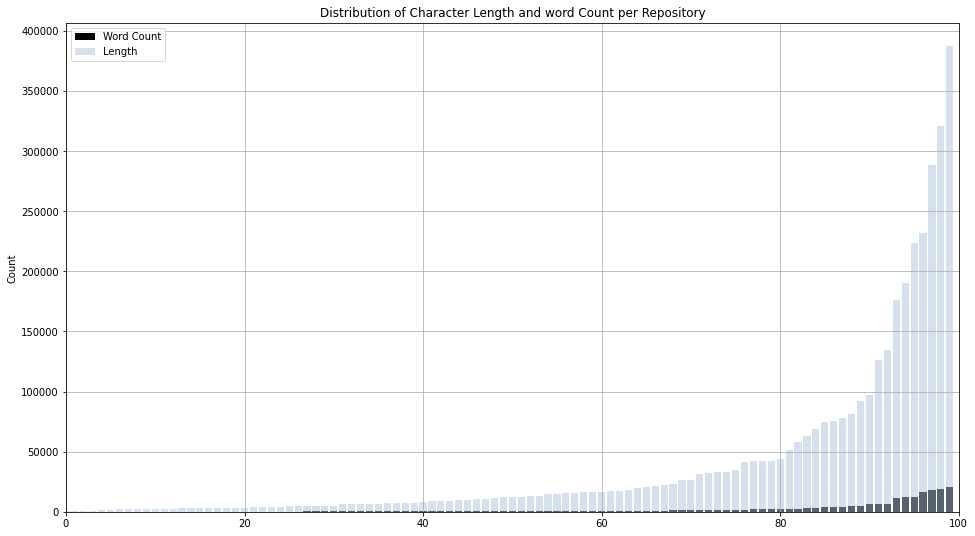

In [5]:
# See distribution of repo lengths and word counts
count(df)

### combine with acquisition?

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Exploration and Pre-Processing:</div>

For Explore, we compared the most common words and bi-grams for each language to each other and the most common overall.

# Split: Train, Test

In [6]:
# Creating Train with language for visualization by merging X_train and y_train:
X_train, X_test, y_train, y_test = split(df)
df_train = pd.DataFrame(X_train)
train = df_train.merge(y_train, on= df_train.index)


In [7]:
# Checking what we're working with:
train.head()

,key_0,words,language
0,66,scrcpy v124 img width128 height128 altscrcpy a...,C
1,63,rust programming language main source code rep...,Rust
2,94,flask flask lightweight wsgi_ web application ...,Python
3,96,atom build atom repository atom archived decem...,JavaScript
4,57,line need empty line c kramdown isnt smart dea...,Java


### charts, graphs, word frequency

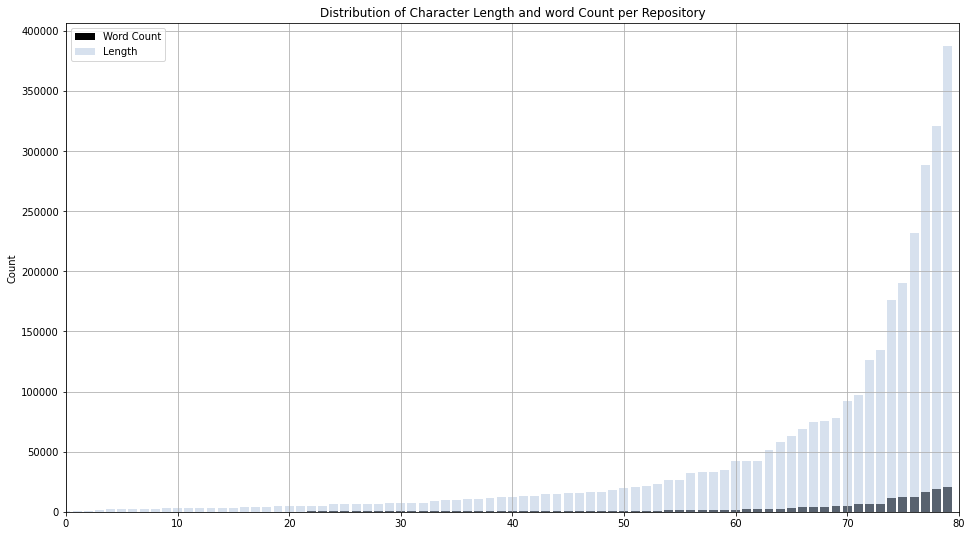

In [8]:
# Word Count and Length of each Repository Readme, visually:
train_count(df, train)

### Word Use Charts:

Normal Word Use by Language:


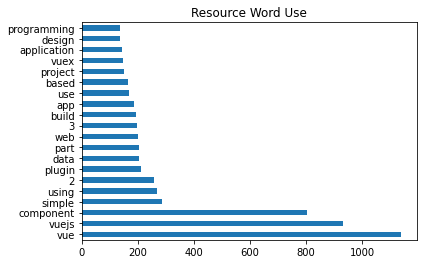

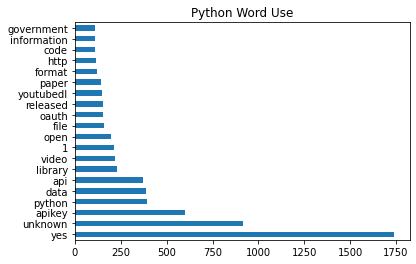

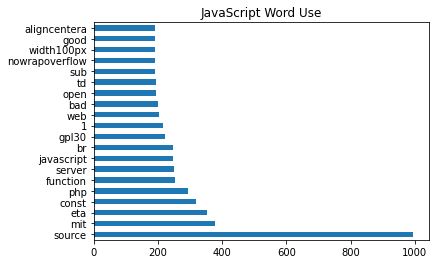

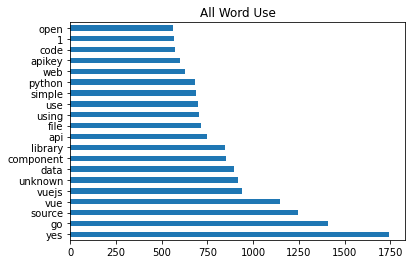

 
Bigram Word Use by Language


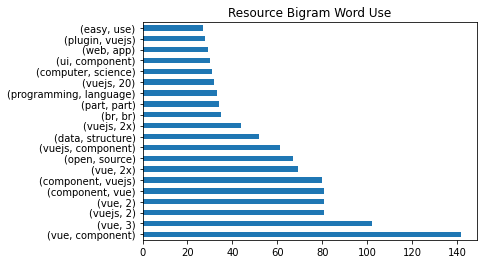

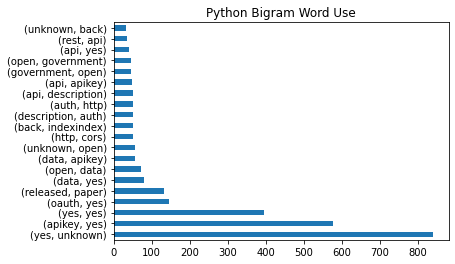

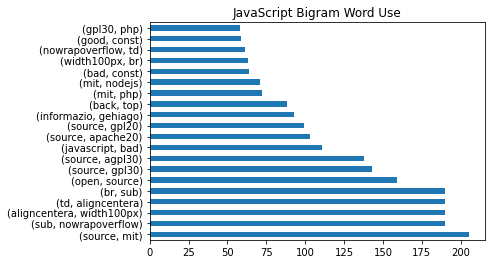

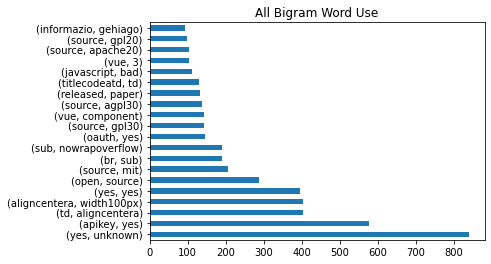

In [9]:
# Charting word use and bigram use by Top Three Language and All:
bigram_charts(train)

### Word Cloud Images

Word Clouds of Most Used Word by Language


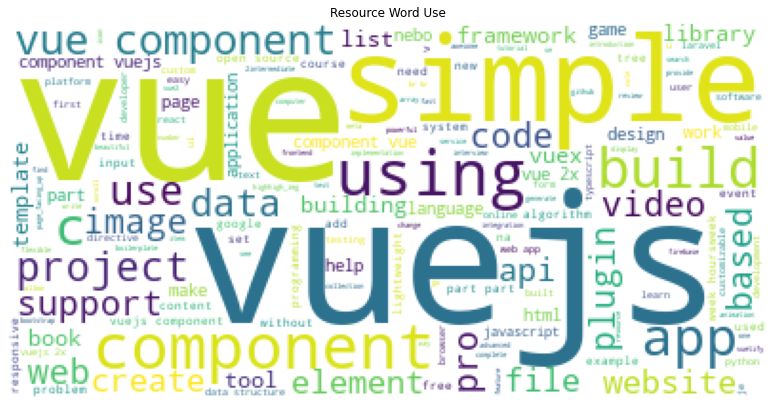

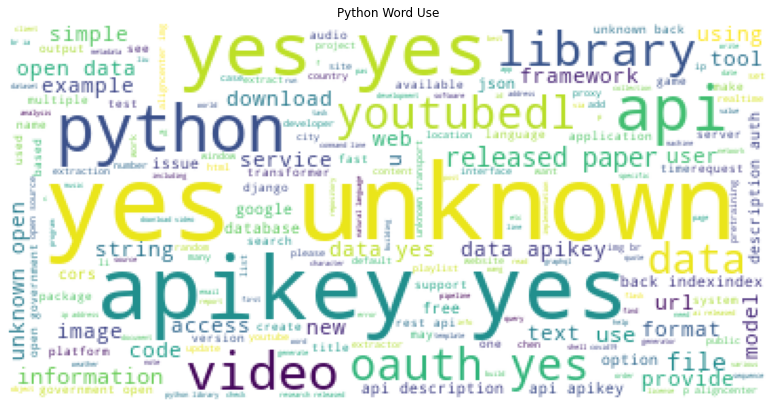

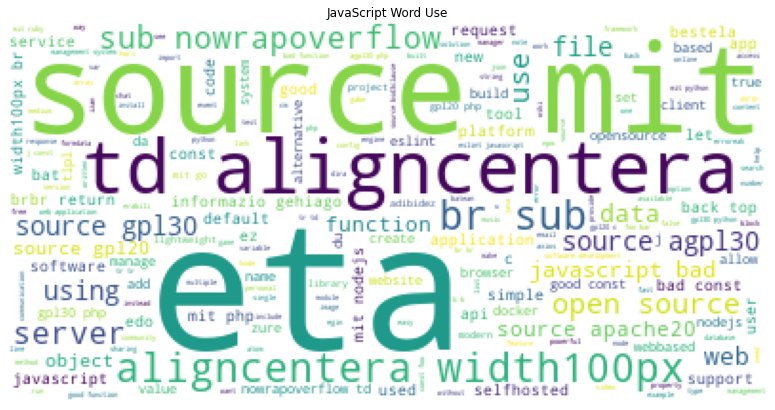

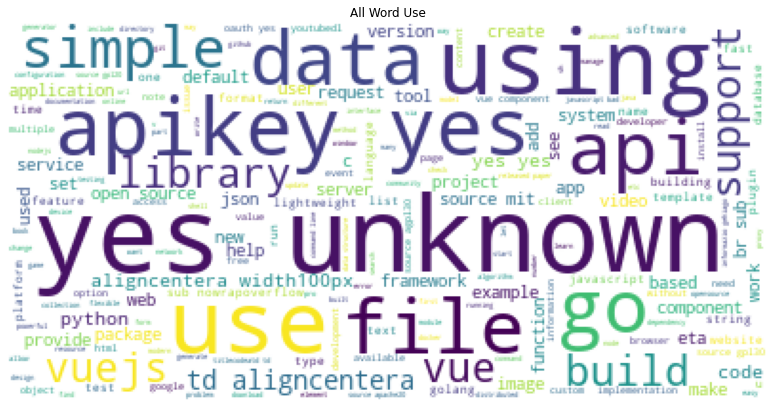

 
Word Clouds of Most Used Bigrams by Language


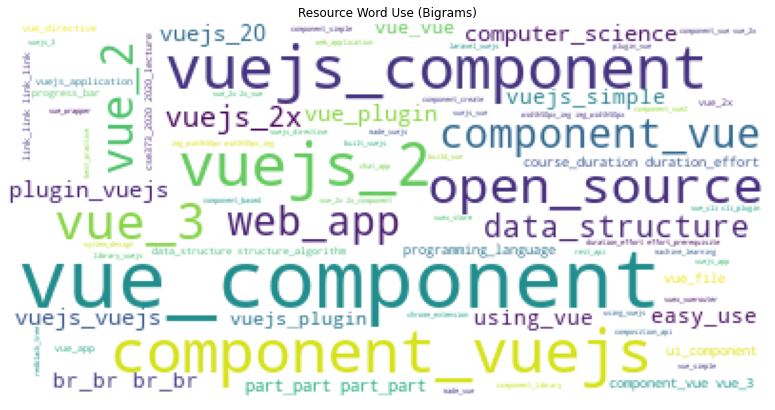

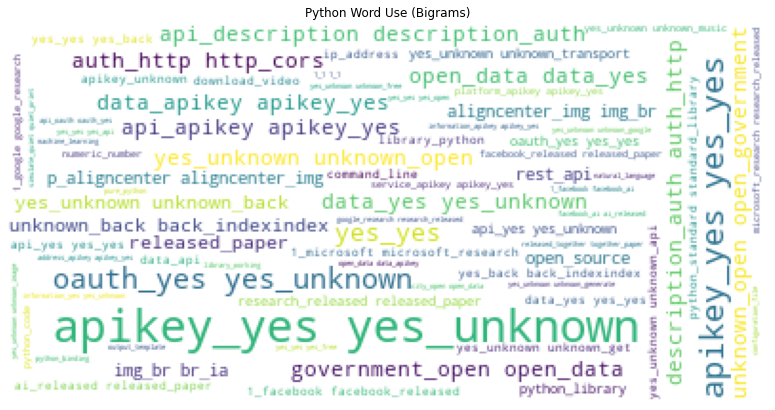

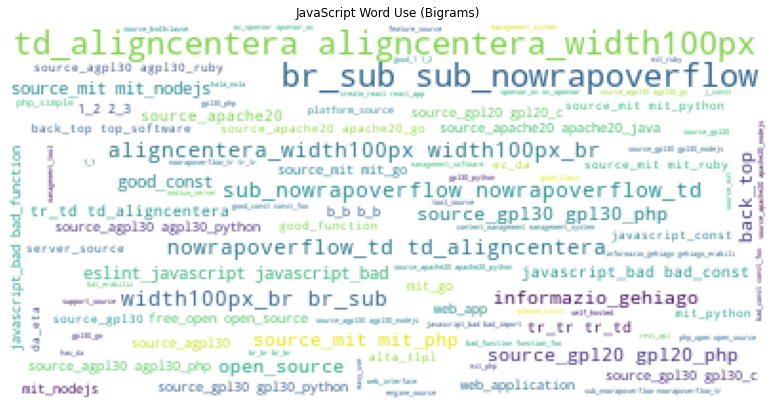

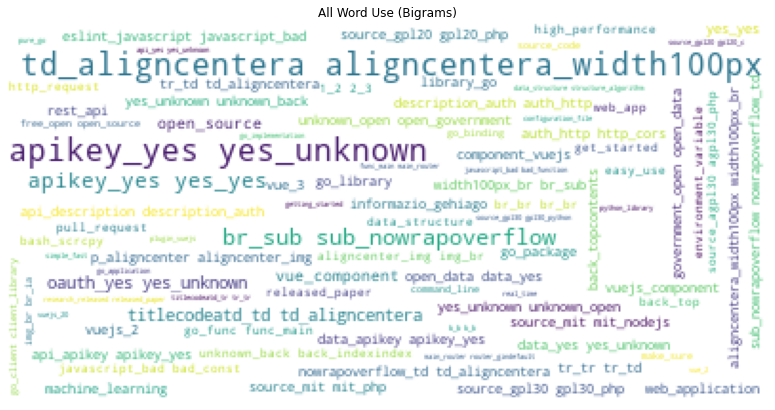

In [10]:
# creating wordclouds for word use and bi-gram use by Top Three Language and All:
wordcloud_img(train)

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Modeling:</div>

For Modeling we decided to try Decision Tree with and without n-grams (bi- and tri-) as well as trying a Random Forest with n-grams.

Our Baseline was 25% in favour of JavaScript as it had the most documents in our dataset.
- All models on Train performed well over baseline
- With our Chosen Model of the Decision Tree with n-grams performing consistently on both Train and Test.

### Models and Performance

In [11]:
# Let's view what we're working with
train.head()

,key_0,words,language
0,66,scrcpy v124 img width128 height128 altscrcpy a...,C
1,63,rust programming language main source code rep...,Rust
2,94,flask flask lightweight wsgi_ web application ...,Python
3,96,atom build atom repository atom archived decem...,JavaScript
4,57,line need empty line c kramdown isnt smart dea...,Java


In [12]:
# Running the Basic Decision Tree with just the normal words (depth 3):
modeling_tree(df)

Accuracy of Decision Tree (Using Basic words and max_depth 3) on Train: 0.4625
Feature Importance:
click      0.117487
meetups    0.148735
object     0.151328
book       0.209481
python     0.236744
dtype: float64


In [13]:
# Running Decision tree with normal words, bi- and tri- grams (depth 5):
modeling_bi_tri_tree(df)

 Accuracy of Decision Tree (Using 1 - 3 ngrams and max_depth 5) on Train: 0.625
Feature Importance:
meetups     0.086050
object      0.087550
bash npm    0.092555
book        0.121195
python      0.136968
dtype: float64


In [14]:
# Running Random Forest with normal words, bi- and tri- grams (depth 4):
modeling_rf(df)

Accuracy of Random Forest classifier on training set: 0.53
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
          C#       0.00      0.00      0.00         1
         C++       1.00      0.29      0.44         7
     Clojure       0.00      0.00      0.00         1
          Go       1.00      0.40      0.57         5
        Java       0.00      0.00      0.00         4
  JavaScript       0.29      1.00      0.45        15
    Markdown       0.00      0.00      0.00         1
         PHP       0.00      0.00      0.00         1
      Python       1.00      0.50      0.67        10
        Rust       0.00      0.00      0.00         2
       Shell       1.00      0.25      0.40         4
  TypeScript       1.00      0.30      0.46        10
  Vim Script       0.00      0.00      0.00         1
         Vue       0.00      0.00      0.00         1
   resources       0.88      0.93      0.90        15

    accuracy         

The n-gram Decision Tree had the highest baseline accuracy, so we decided to check how it did on Test, it performed within a few percent of it's Train model.
- Due to only have 1 Readme for several languages, this probably played a role as at least two of the languages in Test were not found in Train.

In [15]:
# Running the normal, bi- and tri- gram tree on Test:
tree_test(df)

Accuracy of Decision Tree on Test: 0.6
Feature Importance:
meetups     0.086050
object      0.087550
bash npm    0.092555
book        0.121195
python      0.136968
dtype: float64


---

# <div style="background-color:salmon; text-align:center; color:black; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Findings:</div>

## Baseline Accuracy: 25% (Predicting Javascript as the most occurring)
### The "resources" type repo have the longest lengths and words combined, however

## 1. M

## 2. M

## 3. M

## The best model " " performed at 60%

---

# <div style="background-color:salmon; text-align:center; color:black; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Recommendations/Next Steps:</div>

# Recommendations:

## 1. M

## 2. M

## 3. M

# Next Steps:
### - Narrow down repositiory languages 

---